## Problem Definition

Flatiron Deals.com is an e-commerce website which sells Online Courses such as 'Data Science in 30 Minutes'. Thanks to it's pop-up advertisements it is visited by thousands of people. But the sales are pretty low. It wants to build a new chat box assistance to assist visitors and with this website it wants to target people who more likely to shop from the website. For that it wants to create a model to predict whether a visitor is a potential costumer or not.

AlSe is a Data Management Company based in London since 1895. AlSe will build a classification model for Flatiron Deals which will classify it's online visitors to help new chat-box feature to target buyers.

It's a Binary Classification Problem. We will create a baseline model by trying a few different classifiers and then improve our model.

## Obtaining the DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn. model_selection import cross_val_predict
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

## Scrubbing

In [4]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.duplicated().sum()

125

Our Data Looks pretty clean without any nulls and very small number of duplicates which highly likely to be by chance.

## Exploration

In [6]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes. 
The 'Revenue' attribute can be used as the class label. 

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



In [7]:
df.shape

(12330, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [9]:
df.Revenue.value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

Checking Values of Special Day:

In [10]:
df.SpecialDay.value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [11]:
# Assiging X and y to Features and Target Variables
X = df.drop(columns=['Revenue'], axis = 1)
y = df['Revenue']

In [12]:
seed=42
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=seed)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9864, 17), (2466, 17), (9864,), (2466,))

In [14]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
1785,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,Mar,2,6,1,1,Returning_Visitor,False
10407,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,Nov,2,2,3,2,Returning_Visitor,False
286,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False
6520,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,Sep,2,2,8,2,New_Visitor,False
12251,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,Nov,3,2,7,8,New_Visitor,True


In [15]:
for i in X_train.columns:
    print(i)
    print(len(X_train[i].value_counts()))

Administrative
27
Administrative_Duration
2806
Informational
14
Informational_Duration
1064
ProductRelated
289
ProductRelated_Duration
7816
BounceRates
1607
ExitRates
3954
PageValues
2143
SpecialDay
6
Month
10
OperatingSystems
8
Browser
13
Region
9
TrafficType
20
VisitorType
3
Weekend
2


 We have 6 continues variables and the rest is categorical
 

In [16]:
df_con = X_train[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
               'BounceRates', 'ExitRates', 'PageValues']]
df_cat = X_train.drop(columns=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
               'BounceRates', 'ExitRates', 'PageValues'], axis=1)
df_con.reset_index(drop=True,inplace=True)
df_cat.reset_index(drop=True,inplace=True)

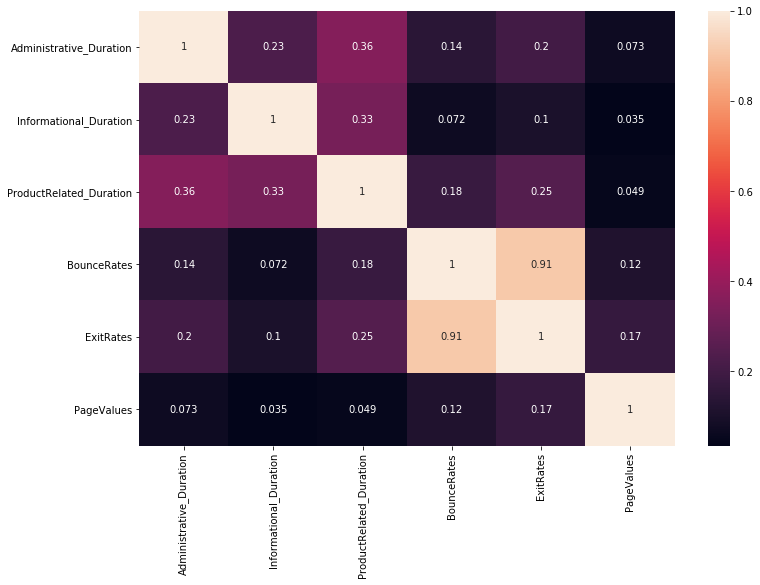

In [17]:
## Create a heatmap to check correlation between these variables
fig = plt.figure(figsize=(12,8))
sns.heatmap(X_train[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
               'BounceRates', 'ExitRates', 'PageValues']].corr().abs(), annot=True)

There is a high chance of multicollinearity between ExitRates and BounceRates



In [18]:
df_con.drop(columns='BounceRates', inplace=True)

In [19]:
## Take a quick look at categorical variables
for i in df_cat.columns:
    print(i)
    print(X_train[i].unique())
    print('\n')

Administrative
[ 0  2  5  3  1  4 16 14  7 13  8 17  6  9 11 10 18 15 12 19 24 23 20 22
 26 21 27]


Informational
[ 0  4  1  2  3  6  9  5  7  8 12 24 10 16]


ProductRelated
[  7  81   1   5   9  10   6  24   3  22 103  19  17  92  29  20  11  45
  32  13  86   4  94  26  38   8  41  90  30  28  31  16  51 164 120 262
 140  12 107   2  63  23  37  15  72  18  21  84  33  70 132 156  34  14
 117  42  49  60 206  43  64 200  74  75  39  36 101  99 195  82 134  44
  87 106  52  61  25 133  27 129  50 204  73  46  40  35  59  65  48  79
 118  98  62 174 169  54  69  76 221  83 198 213 110 149 114  53  89 143
 122  57 177 152  77  71 127  47 100 351   0  96 219  55 139  95 151  58
 292  66 179 439 109  88  56 112  80  68  85 150 264  91 113 184 326 362
 232 142 105 102 378 243 193 159 349 229 138 449 111 191 108 126 146 135
 377 116  93 147  78  97 121 104 123 173 171  67 154 130 274 175 160 194
 186 124 280 141 131 189 125 166 137 238 145 220 157 254 374 115 309 534
 163 705 178 233 199 

There are two months January, April missing in Months attribute. This might indicate a mistake during the data collection and mislead us. Since we don't know the previous info about it, we wont use this attribute.

To check correlation between variables:


Two categorical variable use Chi-square

Two or more quantitative variable (Continuous or discrete) use Pearson correlation (r)

One categorical and one quantitative variable (Continuous or discrete) use ANOVA.

Then for further investigation you can go for the different regression model.

## Baseline Model


In [20]:
ohe = OneHotEncoder()
#Create df of just categorical string values
#Fit transform the variables and place them in a dataframe
encoded_vars = ohe.fit_transform(df_cat).toarray()
ohe_df = pd.DataFrame(encoded_vars, columns=ohe.get_feature_names(df_cat.columns))

In [21]:
ohe_df.head()

,Administrative_0,Administrative_1,Administrative_2,Administrative_3,Administrative_4,Administrative_5,Administrative_6,Administrative_7,Administrative_8,Administrative_9,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
df_joined = ohe_df.join(df_con,how='left')

In [23]:
df_joined.shape

(9864, 406)

In [24]:
tree_base_clf = DecisionTreeClassifier()
cv = KFold(n_splits=5, random_state=seed)
score = round(np.mean(cross_val_score(tree_base_clf,df_joined, y_train, cv = cv,  scoring='f1')),4)

In [25]:
score

0.5511

Our baseline model is a Decision Tree classifier with 0.54 f1 score. F1 score is harmonic mean of precision and recall.

F1= 2 * ((precision * recall)/(precision + recall)).

In this case our model seems performing pretty low. It's a binary classification task which mean even a random choice would have around %50 accuracy.

Since we want to detect the potential costumers (we surely don't want to miss them) we will use recall score as our performance measure. 

Recall = TP/(TP+FN)

# Model Selection

We will try different classifiers and measure their performance via crossvalidation by using GridSearchCV.

Finally we will list our top models and create an ensemble method to see if they perform well together.

Models:
Linear SVM Classification
Non Linear SVM Classification
Decision Trees
Logistic Regression
K- Nearest Neighbours

Ensemble:
Random Forrest
Extra Trees Classifier
Gradient Boosting
Ada Boost
Bagging and Pasting

In [26]:
##Preprocessing
scaler = StandardScaler()
scaled_num = pd.DataFrame(scaler.fit_transform(df_con), columns= df_con.columns)
df_scaled_joined = ohe_df.join(scaled_num,how='left')

### Logistic Regression Classifier

In [27]:
param_grid = [{'C': np.logspace(0,4,10), 'penalty': ['l1','l2']}]
log_clf = LogisticRegression(class_weight='balanced')

In [28]:
grid_logistic = GridSearchCV(log_clf, param_grid, cv=5, scoring='roc_auc', return_train_score=True)

In [29]:
grid_logistic.fit(df_scaled_joined, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=T

In [30]:
grid_logistic.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [31]:
best_log = grid_logistic.best_estimator_
best_log

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_train_log_predict = cross_val_predict(best_log, df_scaled_joined, y_train, cv=3)

In [33]:
cm_log = confusion_matrix(y_train, y_train_log_predict)
cm_log

array([[7181, 1186],
       [ 367, 1130]])

In [34]:
precision_log= precision_score(y_train, y_train_log_predict)
recall_log = recall_score(y_train, y_train_log_predict)
auc_log = auc(y_train, y_train_log_predict)
print('precision: ' + str(round(precision_log, 3)), 'recall: ' + str(round(recall_log,3)))
print('Auc: ' + str(round(auc_log,3)))

precision: 0.488 recall: 0.755
Auc: 994.5


In [35]:
y_scores = best_log.decision_function(df_scaled_joined)

In [36]:
roc_auc_log = roc_auc_score(y_train, y_scores)
print(roc_auc_log)

0.9204163476149543


In [37]:
precisions_all, recalls_all, thresholds_all = precision_recall_curve(y_train, y_scores)

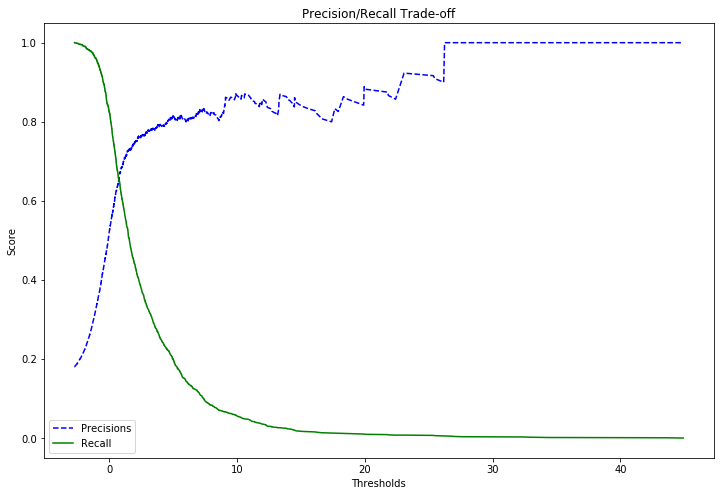

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    fig = plt.figure(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precisions')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Thresholds')
    plt.ylabel("Score")
    plt.title('Precision/Recall Trade-off')
    plt.legend()

plot_precision_recall_vs_threshold(precisions_all, recalls_all, thresholds_all)

Plot above shows us how our True Positive Rate and and accuracy changes according to threshold. As we can see as the threshold increases Precision increases as well. (It's little bumpy because model sometimes misses the true classification due to it's probability of likelihood is high). Although the recall falls smoothly due with the high threshold. We aim high recall since we don't want to miss any costumers by misclassifying them as browsers.

No handles with labels found to put in legend.


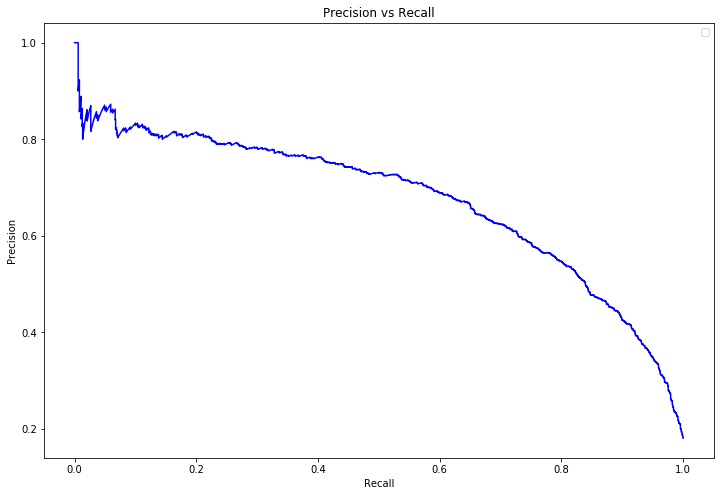

In [39]:
def plot_precison_vs_recall(precisions, recalls):
    fig = plt.figure(figsize=(12,8))
    plt.plot(recalls, precisions, 'b-')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("Precision vs Recall")
    plt.legend()
plot_precison_vs_recall(precisions_all, recalls_all)

As we can see from the graph the precison starts to fall sharply around %25 recall. We want to select a precision/recall trade off just before precision drops which is %60 recall. Initially we said that we don't want to miss any customers who more likely to buy something from our online store but we also don't want to use our assistance resources to browsers who are just happened to be visiting our website. That's why a certain degree of precision will also be crucial for us.

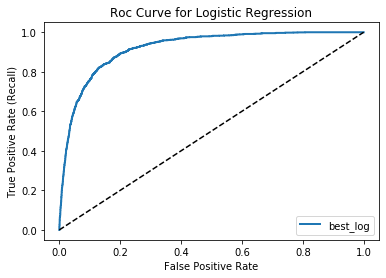

In [40]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth= 2, label=label)
    plt.plot([0,1], [0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Roc Curve for Logistic Regression')
    plt.legend(loc=4)

plot_roc_curve(fpr, tpr, label='best_log')
plt.show()

### K-Nearest Neighbors

In [41]:
param_grid_k = [{'leaf_size': [2,4,6,8,10], 'n_neighbors': [2,4,6,8]}]
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_k, cv=5, scoring='roc_auc', return_train_score=True)

In [ ]:
grid_knn.fit(df_scaled_joined, y_train)

The roc curve which displays Recall versus False Positive.

## Choosing the Best Threshold

As we checked above there are different threshold values which can be used to trade off between recall and precision. It's very hard to choose the best threshold just by looking at the graphs above(even though it gives us some sense of how the threshold value effects recall and precision) because it all depends on our business costs to balance recall - precision by choosing the right threshold. That's why we will use the formula created by Zweig and Campbell:


m = ((1- Prevalence)/Prevalence)* (Cfp - Ctn)/(Cfn - Ctp)

fm = TPR - m(FPR)
We will choose the threshold with highest fm

Cost False Positive = 100 that we will be assisting a visitor which is not a potential customer.

Cost True Negative = 0 

Cost False Negative = 1000 our opportunity cost, which we didn't assist a potential customer.

Cost True Positive = - (1000 - 100) which is the money that we will be making assisting a potential costumer

Prevalence = Our actual true rate

In [ ]:
y_train.value_counts()

In [ ]:
cfp = 150
ctn = 0
cfn = 200
ctp = -50
prevalence = 1497/8367
m = ((1 - prevalence)/prevalence)*((cfp - ctn)/(cfn - ctp))

Let's create a data frame with the values of thresholds, tpr and fpr.

In [ ]:
df_for_threshold = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Threshold': thresholds})
df_for_threshold['FM'] = tpr - m*(fpr)

In [ ]:
df_for_threshold.loc[df_for_threshold['FM'] == df_for_threshold.FM.max()]

According to formula above the best Threshold for our model will be 0.42.

In [ ]:
threshold = 0.426628

In [ ]:
plot_precision_recall_vs_threshold(precisions_all, recalls_all, thresholds_all)
plt.axvline(threshold, c='red', linestyle='--', label='threshold', ymax=0.95, ymin=0.05)
plt.legend()
plt.show()

As we see from the graph our threshold is very close to the point where Precisions and Recall both still high but start dropping.